# Tayyib IsmaiL 20K-0461
## 5G GrayScale using MobileNet

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
names = ["4QAM", "8QAM", "16QAM", "32QAM", "64QAM"]

In [ ]:
# Get the path to the data
path = "/content/drive/MyDrive/5G"

# Get a list of the subfolders
subfolders = os.listdir(path)

# Create a list to store the filenames and categories
filenames = []
categories = []

# Iterate over the subfolders
for subfolder in subfolders:

    # Get a list of the files in the subfolder
    files = os.listdir(os.path.join(path, subfolder))

    # Iterate over the files
    for file in files:

        # Get the category for the file
        category = subfolder

        # Append the filename and category to the lists
        filenames.append(path+'/'+category+'/'+file)

        categories.append(category)

# Create a DataFrame
data = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Print the DataFrame
print(data)


                                          filename category
0     /content/drive/MyDrive/5G/16QAM/16QAM301.png    16QAM
1     /content/drive/MyDrive/5G/16QAM/16QAM398.png    16QAM
2     /content/drive/MyDrive/5G/16QAM/16QAM388.png    16QAM
3     /content/drive/MyDrive/5G/16QAM/16QAM107.png    16QAM
4     /content/drive/MyDrive/5G/16QAM/16QAM139.png    16QAM
...                                            ...      ...
1933     /content/drive/MyDrive/5G/8QAM/8QAM43.png     8QAM
1934     /content/drive/MyDrive/5G/8QAM/8QAM28.png     8QAM
1935     /content/drive/MyDrive/5G/8QAM/8QAM60.png     8QAM
1936     /content/drive/MyDrive/5G/8QAM/8QAM33.png     8QAM
1937     /content/drive/MyDrive/5G/8QAM/8QAM41.png     8QAM

[1938 rows x 2 columns]


In [ ]:
data2=data.copy()
data2

,filename,category
0,/content/drive/MyDrive/5G/16QAM/16QAM301.png,16QAM
1,/content/drive/MyDrive/5G/16QAM/16QAM398.png,16QAM
2,/content/drive/MyDrive/5G/16QAM/16QAM388.png,16QAM
3,/content/drive/MyDrive/5G/16QAM/16QAM107.png,16QAM
4,/content/drive/MyDrive/5G/16QAM/16QAM139.png,16QAM
...,...,...
1933,/content/drive/MyDrive/5G/8QAM/8QAM43.png,8QAM
1934,/content/drive/MyDrive/5G/8QAM/8QAM28.png,8QAM
1935,/content/drive/MyDrive/5G/8QAM/8QAM60.png,8QAM
1936,/content/drive/MyDrive/5G/8QAM/8QAM33.png,8QAM


In [ ]:
data2 = data2[data2["category"].isin(["4QAM", "8QAM"])]


In [ ]:
data2

,filename,category
738,/content/drive/MyDrive/5G/4QAM/4QAM67.png,4QAM
739,/content/drive/MyDrive/5G/4QAM/4QAM202.png,4QAM
740,/content/drive/MyDrive/5G/4QAM/4QAM329.png,4QAM
741,/content/drive/MyDrive/5G/4QAM/4QAM396.png,4QAM
742,/content/drive/MyDrive/5G/4QAM/4QAM109.png,4QAM
...,...,...
1933,/content/drive/MyDrive/5G/8QAM/8QAM43.png,8QAM
1934,/content/drive/MyDrive/5G/8QAM/8QAM28.png,8QAM
1935,/content/drive/MyDrive/5G/8QAM/8QAM60.png,8QAM
1936,/content/drive/MyDrive/5G/8QAM/8QAM33.png,8QAM


In [ ]:
def print_df(data):

    print(f'Number of pictures: {data.shape[0]}\n')
    print(f'Number of different labels: {len(data.category.unique())}\n')
    print(f'Labels: {data.category.unique()}')

In [ ]:
print_df(data)

Number of pictures: 1938

Number of different labels: 5

Labels: ['16QAM' '32QAM' '4QAM' '64QAM' '8QAM']


In [ ]:
print("length of image is: ", plt.imread(data["filename"][0]).shape[0],
      "width is: ", plt.imread(data["filename"][0]).shape[1],
      " and number of channels are: ", plt.imread(data["filename"][0]).shape[2])

length of image is:  528 width is:  677  and number of channels are:  4


In [ ]:
data = data.sample(frac=1, random_state=42)
train_df = data.iloc[:int(0.65*len(data))]
val_df = data.iloc[int(0.65*len(data)):int(0.8*len(data))]
test_df = data.iloc[int(0.8*len(data)):]

train_df.category.value_counts()

32QAM    266
8QAM     255
64QAM    255
4QAM     247
16QAM    236
Name: category, dtype: int64

In [ ]:
val_df.category.value_counts()

4QAM     74
32QAM    60
8QAM     57
64QAM    57
16QAM    43
Name: category, dtype: int64

In [ ]:
test_df.category.value_counts()

8QAM     88
64QAM    88
4QAM     79
32QAM    72
16QAM    61
Name: category, dtype: int64

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

train_generator = data_gen.flow_from_dataframe(
    dataframe=train_df,
    directory=path,
    x_col="filename",
    y_col="category",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224)  ,# Adjust target_size as per your preference
    rescale=1.0/255.
)

validation_generator = data_gen.flow_from_dataframe(
    dataframe=val_df,
    directory=path,
    x_col="filename",
    y_col="category",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224) , # Adjust target_size as per your preference,
    rescale=1.0/255.
)

test_generator = data_gen.flow_from_dataframe(
    dataframe=test_df,
    directory=path,
    x_col="filename",
    y_col="category",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224) , # Adjust target_size as per your preference
    rescale=1.0/255.
)

Found 1259 validated image filenames belonging to 5 classes.
Found 291 validated image filenames belonging to 5 classes.
Found 388 validated image filenames belonging to 5 classes.


In [ ]:
import keras
def get_model(model):
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}

    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False

    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    # x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    # optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    optimizer = keras.optimizers.Adam(lr=0.001)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

## MobileNet

In [ ]:
m = get_model(tf.keras.applications.MobileNetV2)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
his=m.fit(train_generator, validation_data=validation_generator, epochs=5,verbose=1)


Epoch 1/5
40/40 [==============================] - 197s 5s/step - loss: 1.5494 - accuracy: 0.2685 - val_loss: 1.5193 - val_accuracy: 0.2543
Epoch 2/5
40/40 [==============================] - 136s 3s/step - loss: 1.4819 - accuracy: 0.3161 - val_loss: 1.4565 - val_accuracy: 0.3093
Epoch 3/5
40/40 [==============================] - 137s 3s/step - loss: 1.4867 - accuracy: 0.3090 - val_loss: 1.5347 - val_accuracy: 0.2955
Epoch 4/5
40/40 [==============================] - 117s 3s/step - loss: 1.4701 - accuracy: 0.3185 - val_loss: 1.4518 - val_accuracy: 0.3574
Epoch 5/5
40/40 [==============================] - 136s 3s/step - loss: 1.4738 - accuracy: 0.2963 - val_loss: 1.4545 - val_accuracy: 0.2612


In [ ]:
from sklearn.metrics import classification_report,accuracy_score
pred = m.predict(test_generator)
pred = np.argmax(pred,axis=1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
y_test = list(test_df.category)
acc = accuracy_score(y_test,pred)
print(f'{acc*100:.2f}% accuracy on the test set')

13/13 [==============================] - 88s 7s/step
19.07% accuracy on the test set


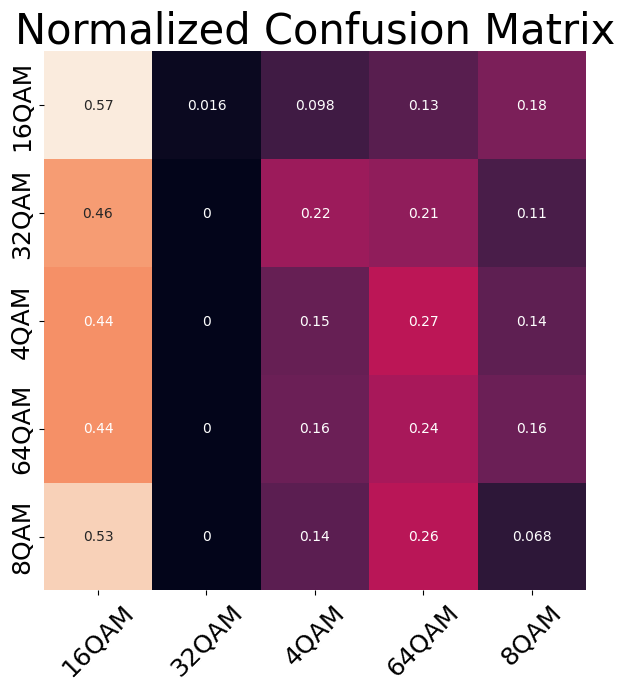

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (7,7))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 30)
plt.xticks(fontsize=18,rotation=45)
plt.yticks(fontsize=18)
plt.show()


## Test for less categories

In [ ]:
data2 = data2.sample(frac=1, random_state=42)
train_df = data2[:int(0.8*len(data2))]
val_df = data2[int(0.8*len(data2)):int(0.9*len(data2))]
test_df = data2[int(0.9*len(data2)):]

In [ ]:
import keras
def get_model(model):
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}

    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False

    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    # x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(1, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    # optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    optimizer = keras.optimizers.Adam(lr=0.001)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
m = get_model(tf.keras.applications.MobileNetV2)


In [ ]:
train_generator = data_gen.flow_from_dataframe(
    dataframe=train_df,
    directory=path,
    x_col="filename",
    y_col="category",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="binary",
    target_size=(224, 224)  # Adjust target_size as per your preference
)

validation_generator = data_gen.flow_from_dataframe(
    dataframe=val_df,
    directory=path,
    x_col="filename",
    y_col="category",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="binary",
    target_size=(224, 224)  # Adjust target_size as per your preference
)

test_generator = data_gen.flow_from_dataframe(
    dataframe=test_df,
    directory=path,
    x_col="filename",
    y_col="category",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224)  # Adjust target_size as per your preference
)


Found 640 validated image filenames belonging to 2 classes.
Found 80 validated image filenames belonging to 2 classes.
Found 80 validated image filenames belonging to 2 classes.


In [ ]:
his=m.fit(train_generator, validation_data=validation_generator, epochs=5,verbose=1)

Epoch 1/5
20/20 [==============================] - 101s 3s/step - loss: 0.7243 - accuracy: 0.4984 - val_loss: 0.5922 - val_accuracy: 0.5375
Epoch 2/5
20/20 [==============================] - 58s 3s/step - loss: 0.5471 - accuracy: 0.4984 - val_loss: 0.5332 - val_accuracy: 0.5375
Epoch 3/5
20/20 [==============================] - 70s 3s/step - loss: 0.4870 - accuracy: 0.4984 - val_loss: 0.5656 - val_accuracy: 0.5375
Epoch 4/5
20/20 [==============================] - 54s 3s/step - loss: 0.5116 - accuracy: 0.4984 - val_loss: 0.5798 - val_accuracy: 0.5375
Epoch 5/5
20/20 [==============================] - 56s 3s/step - loss: 0.5335 - accuracy: 0.4984 - val_loss: 0.5317 - val_accuracy: 0.5375


In [ ]:
from sklearn.metrics import classification_report,accuracy_score
pred = m.predict(test_generator)
pred = np.argmax(pred,axis=1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
y_test = list(test_df.category)
acc = accuracy_score(y_test,pred)
print(f'{acc*100:.2f}% accuracy on the test set')

3/3 [==============================] - 15s 4s/step
52.50% accuracy on the test set


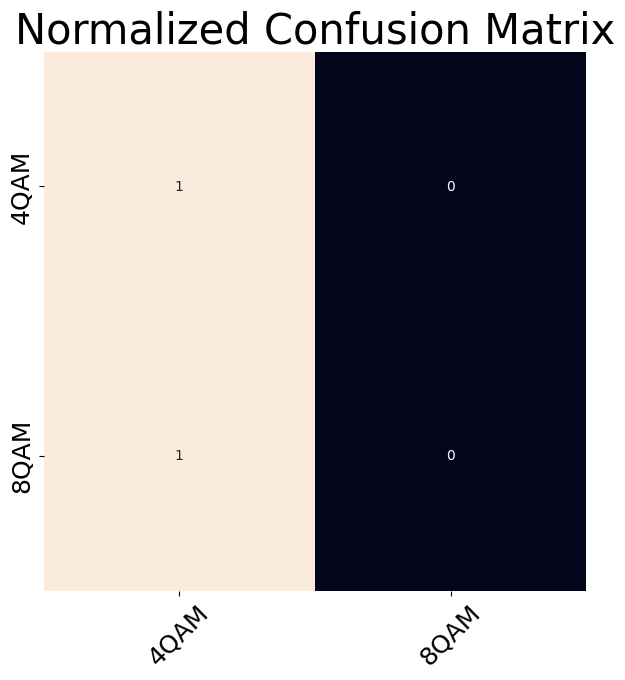

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (7,7))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 30)
plt.xticks(fontsize=18,rotation=45)
plt.yticks(fontsize=18)
plt.show()
